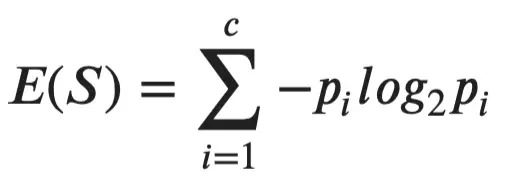

In [13]:
from IPython.display import Image
Image(filename= "C:/Users/Predator/Downloads/entropy_calculation.jpg", width=800, height=800)

### Import Libraries
##### Here, we import the necessary libraries, including NumPy for numerical operations and Counter from the collections module to help with counting unique labels.

In [5]:
import numpy as np
from collections import Counter

### Node class
##### This Node class represents the nodes of the decision tree. Each node has attributes like feature (the index of the feature used for splitting), threshold (the value at which the split occurs), and references to its left and right child nodes. A leaf node contains a value representing the predicted class. The is_leaf_node method checks if the node is a leaf node.

In [ ]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
    
    def is_leaf_node(self):
        return self.value is not None

### DecisionTree Class
##### The DecisionTree class initializes hyperparameters such as min_samples_split, max_depth, and n_features. It also has an attribute root that represents the root node of the decision tree.

In [ ]:
class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.root = None

### fit Method:
##### The fit method takes the input features X and target labels y and builds the decision tree by calling the _grow_tree method. It determines the number of features to consider for splitting based on n_features.

In [ ]:
def fit(self, X, y):
    self.n_features = X.shape[1] if not self.n_features else min(X.shape[1], self.n_features)
    self.root = self._grow_tree(X, y)

### _grow_tree Method
##### The _grow_tree method recursively grows the decision tree. It checks stopping criteria, including maximum depth, purity (if all labels are the same), and minimum samples in a node. If any of these conditions are met, it creates a leaf node with the most common label.

In [ ]:
def _grow_tree(self, X, y, depth=0):
    n_samples, n_feats = X.shape
    n_labels = len(np.unique(y))

    # check the stopping criteria
    if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
        leaf_value = self._most_common_label(y)
        return Node(value=leaf_value)

### Random Feature Selection
##### Here, a random subset of features is selected for splitting at each node.

In [ ]:
feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

### _best_split Method:
##### The _best_split method finds the best feature and threshold to split the data based on information gain. It iterates through the randomly selected features and their unique values to find the optimal split.

In [ ]:
def _best_split(self, X, y, feat_idxs):
    best_gain = -1
    split_idx, split_threshold = None, None

    for feat_idx in feat_idxs:
        X_column = X[:, feat_idx]
        thresholds = np.unique(X_column)

### _information_gain Method:
##### The _information_gain method calculates the information gain for a split. It computes the entropy of the parent node and the weighted average entropy of the child nodes.

In [ ]:
def _information_gain(self, y, X_column, threshold):
    # parent entropy
    parent_entropy = self._entropy(y)

    # create children
    left_idxs, right_idxs = self._split(X_column, threshold)

    if len(left_idxs) == 0 or len(right_idxs) == 0:
        return 0

### _split Method:
##### The _split method splits the data into left and right sets based on the feature threshold.

In [ ]:
def _split(self, X_column, split_thresh):
    left_idxs = np.argwhere(X_column <= split_thresh).flatten()
    right_idxs = np.argwhere(X_column > split_thresh).flatten()
    return left_idxs, right_idxs

### _entropy method
##### The _entropy method calculates the entropy of a set of labels, which measures impurity.

In [ ]:
def _entropy(self, y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log(p) for p in ps if p > 0])

### _most_common_label Method:
##### The _most_common_label method returns the most common label in a set of labels.

In [ ]:
def _most_common_label(self, y):
    counter = Counter(y)
    value = counter.most_common(1)[0][0]
    return value

### predict Method:
##### The predict method predicts the labels for a set of input features X by traversing the decision tree.

In [ ]:
def predict(self, X):
    return np.array([self._traverse_tree(x, self.root) for x in X])

### _traverse_tree Method:
##### The _traverse_tree method recursively traverses the decision tree to make predictions.

In [ ]:
def _traverse_tree(self, x, node):
    if node.is_leaf_node():
        return node.value

    if x[node.feature] <= node.threshold:
        return self._traverse_tree(x, node.left)
    return self._traverse_tree(x, node.right)

### Implementation using scikit-learn

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [3]:
iris=load_iris()
X=iris.data
y=iris.target

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [5]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [6]:
model=DecisionTreeClassifier(ccp_alpha=0.00001,max_depth=4)

In [7]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=1e-05, max_depth=4)

In [8]:
model.get_params()

{'ccp_alpha': 1e-05,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [9]:
import pandas as pd
feature=pd.DataFrame(model.feature_importances_,index=iris.feature_names)
feature

,0
sepal length (cm),0.000000
sepal width (cm),0.019040
petal length (cm),0.580657
petal width (cm),0.400303


C:\Users\Predator\Desktop\Jupyter_Notebook\new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Predator\Desktop\Jupyter_Notebook\new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Predator\Desktop\Jupyter_Notebook\new\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\Predator\Desktop\Jupyter_Notebook\new\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future ver

<Axes: >

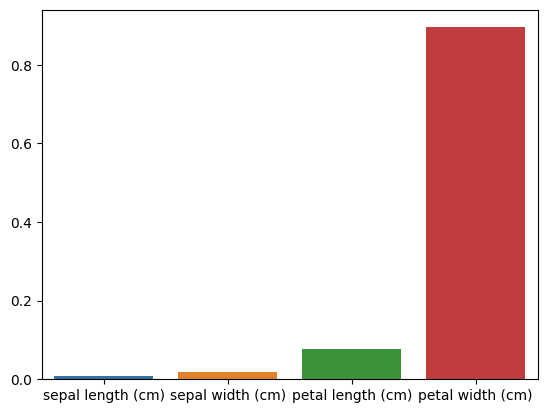

In [52]:
import seaborn as sns
sns.barplot(x=iris.feature_names,y=model.feature_importances_)

In [10]:
y_pred=model.predict(X_test)

In [11]:
accuracy_score(y_pred,y_test)

0.9666666666666667

The `DecisionTreeClassifier` in scikit-learn (sklearn) allows you to customize its behavior by setting various hyperparameters. These hyperparameters control aspects such as the depth of the tree, the splitting criteria, and the handling of class imbalances. Here are some important hyperparameters you can use when creating a `DecisionTreeClassifier`:

1. **criterion** (default="gini" or "entropy"):
   - This hyperparameter determines the function used to measure the quality of a split at each node.
   - "gini" is for the Gini impurity, and "entropy" is for the information gain. You can choose either.
   
2. **splitter** (default="best" or "random"):
   - It specifies the strategy used to choose the split at each node.
   - "best" selects the best split, and "random" selects the best random split.

3. **max_depth** (default=None):
   - The maximum depth of the tree. If not specified, the tree expands until all leaves are pure or contain fewer samples than `min_samples_split`.

4. **min_samples_split** (default=2):
   - The minimum number of samples required to split an internal node. It can be set to an integer value or a float representing a proportion.

5. **min_samples_leaf** (default=1):
   - The minimum number of samples required to be in a leaf node. Similar to `min_samples_split`, it can be set to an integer or a float.

6. **min_weight_fraction_leaf** (default=0.0):
   - The minimum weighted fraction of the sum total of weights (of all input samples) required to be in a leaf node.

7. **max_features** (default=None):
   - The maximum number of features to consider when looking for the best split. You can specify an integer or one of the strings: "auto," "sqrt," "log2," or a float in (0.0, 1.0).

8. **max_leaf_nodes** (default=None):
   - The maximum number of leaf nodes in the tree.

9. **class_weight** (default=None):
   - It can be set to "balanced" to automatically adjust the weights of classes inversely proportional to their frequencies in the input data. You can also provide a dictionary or a list of weights manually.

10. **random_state** (default=None):
    - This parameter sets the seed for the random number generator. If you want reproducible results, set it to an integer.

11. **presort** (default='deprecated' in v0.22, removed in v0.24):
    - This parameter specifies whether to presort the data to speed up the finding of best splits. It's deprecated in newer versions of sklearn.

These are some of the key hyperparameters you can adjust when creating a `DecisionTreeClassifier`. The choice of hyperparameters should be based on your specific problem and dataset, and you may need to fine-tune them through techniques like cross-validation to achieve the best model performance.

[Text(0.4, 0.9, 'x[2] <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [39, 44, 37]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.7, 'x[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 44, 37]'),
 Text(0.2, 0.5, 'x[2] <= 4.95\ngini = 0.156\nsamples = 47\nvalue = [0, 43, 4]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 42\nvalue = [0, 42, 0]'),
 Text(0.3, 0.3, 'x[3] <= 1.55\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.8, 0.5, 'x[2] <= 4.85\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(0.7, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

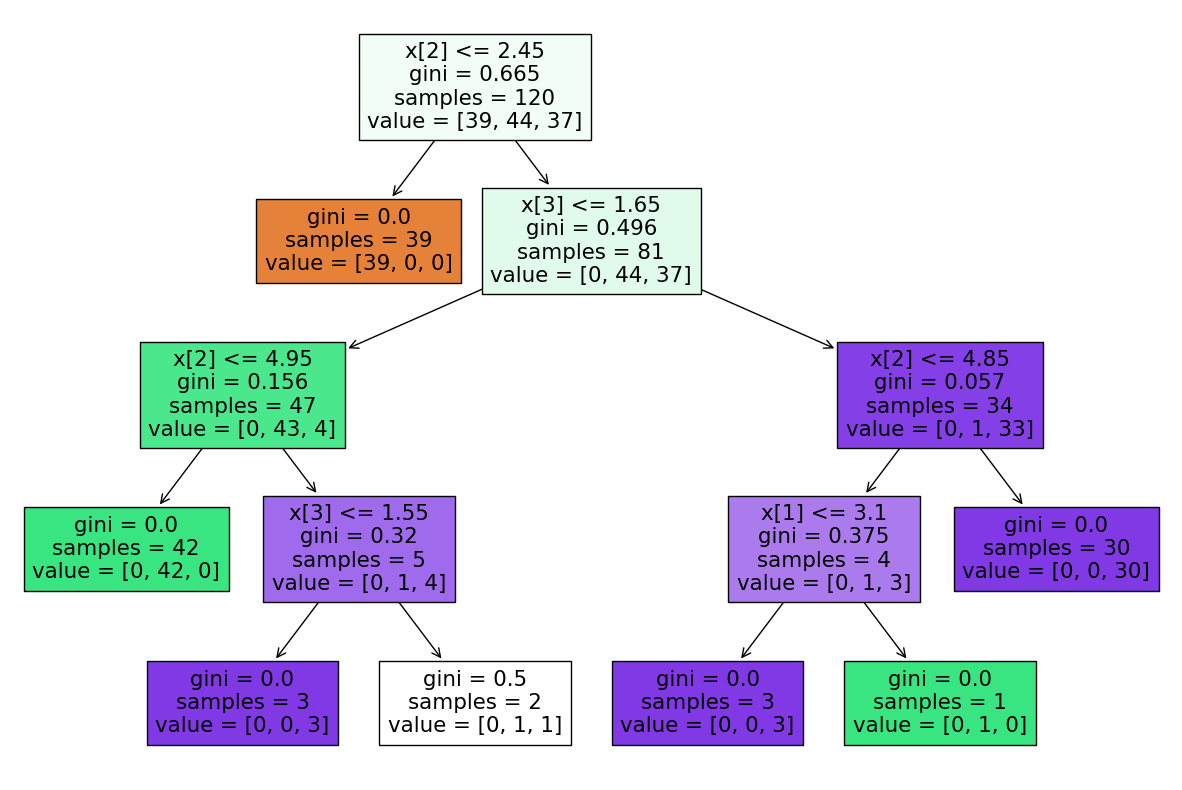

In [12]:
from sklearn import tree
from matplotlib import pyplot as plt

plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)